In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Merge 12 months of sales data into a single csv file 

In [22]:
files =[file for file in os.listdir("C:\\Users\\Admin\\Downloads\\imp files\\assingments\\sales\\Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [23]:
path = "C:\\Users\\Admin\\Downloads\\imp files\\assingments\\sales\\Sales_Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(186850, 6)

##### convert it into dataset

##### Data cleaning and formatting

In [24]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
all_data.shape

(186850, 6)

In [27]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [28]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

##### What is the best month for sale?

In [29]:
'04/19/19 08:46'.split('/')[0]

'04'

In [30]:
def month(x):
    return x.split('/')[0]

##### add month col

In [31]:
all_data['Month']=all_data['Order Date'].apply(month)

In [32]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [33]:
all_data['Month']=all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [34]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [35]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185950

In [36]:
all_data=all_data[~filter]

In [37]:
all_data.shape

(185950, 7)

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [39]:
all_data['Month']=all_data['Month'].astype(int)

In [40]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [41]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [42]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [43]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [44]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

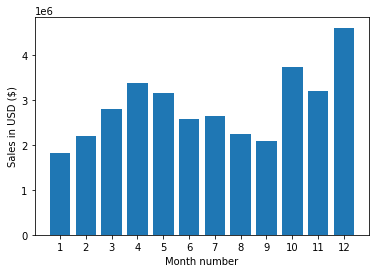

In [46]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##### Which city has max order

In [47]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [48]:
def city(x):
    return x.split(',')[1]

In [49]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [50]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

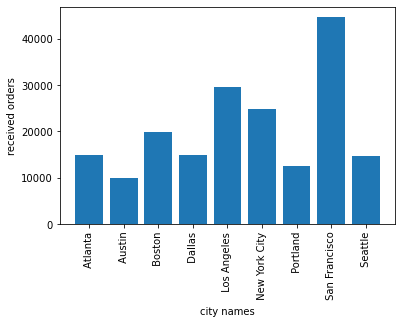

In [51]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

##### What time should we display advertisements to maximise for product purchase?

In [52]:
all_data['Order Date'][0].dtype

dtype('O')

In [53]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

#### What product sold the most? &  Why?

<AxesSubplot:xlabel='Product'>

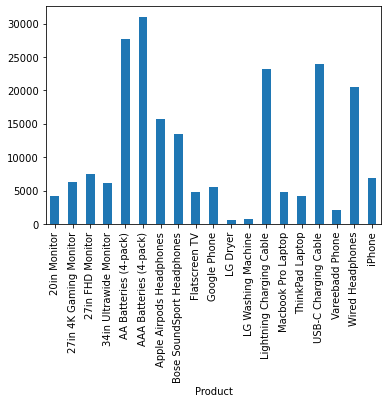

In [54]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [81]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [55]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-56-2f7dc3427216>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

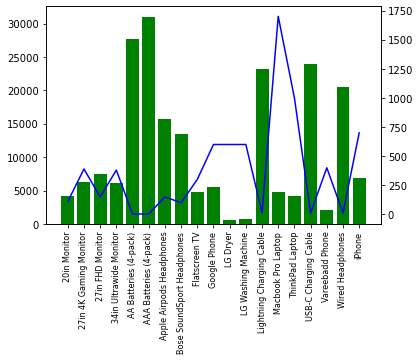

In [56]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.